In [130]:
import pandas as pd
import sklearn as sk
import numpy as np

In [157]:
projects = pd.read_csv("projects.csv")
projects = projects[projects['school_state'].isin(['PA', 'NY'])]
outcomes = pd.read_csv("outcomes.csv")

In [158]:
outcomes = outcomes.set_index("projectid")
outcomes = outcomes["fully_funded"].to_frame()

outcomes['fully_funded'] = outcomes['fully_funded'].map({'t': int(1), 'f': int(0)})
outcomes['fully_funded'] = outcomes['fully_funded'].astype(int)

In [159]:
projects = projects.set_index("projectid")
projects = projects["total_price_excluding_optional_support"].to_frame()

In [160]:
merged = pd.merge(projects, outcomes, on='projectid', how='left')

In [146]:
pd.isna(merged).sum()

,0
total_price_excluding_optional_support,0
fully_funded,0


In [161]:
merged = merged.dropna()

In [162]:
merged = merged.sort_values(by="total_price_excluding_optional_support", ascending=False)

In [148]:
len(merged)

83116

In [149]:
.3 * len(merged)

24934.8

In [150]:
projects.iloc[24934]

,3b126b291bd99b71a3f57bb55d8fcdd1
total_price_excluding_optional_support,410.04


In [163]:
# projects greater than $410 won't get funded
merged["fully_funded_pred"] = 0

In [164]:
merged[merged["total_price_excluding_optional_support"] < 410] = 1

In [166]:
merged.sort_values(by="total_price_excluding_optional_support").head(5)

,total_price_excluding_optional_support,fully_funded,fully_funded_pred
projectid,,,
7e5114157ccd9802fde72d53a7de6362,1.0,1,1
3c52d4529ba0f44519523788601db9f1,1.0,1,1
9ab490f5927dc102b0d059ae61d1714f,1.0,1,1
f6ebb1f71f7ce08f15e76eaf12230d87,1.0,1,1
9ad7cdd164978bb69e73b7462f9c6286,1.0,1,1


In [165]:
merged['fully_funded'] = merged['fully_funded'].astype(int)

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, roc_curve, auc, RocCurveDisplay

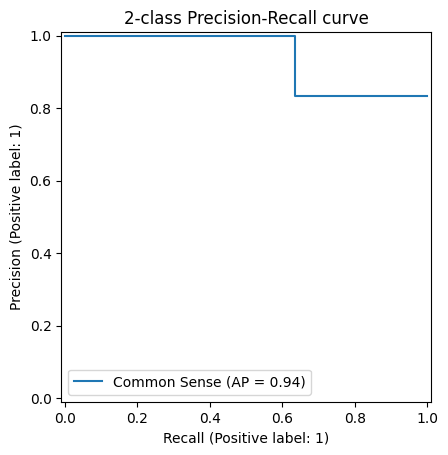

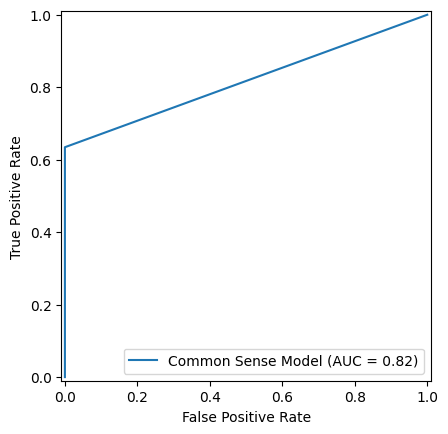

In [169]:
y_test = merged['fully_funded']
y_pred = merged['fully_funded_pred']

pr_display = PrecisionRecallDisplay.from_predictions(
    y_test, y_pred, name="Common Sense"
)

pr_display.ax_.set_title("2-class Precision-Recall curve")

pr_display.figure_.savefig('rf_precision_recall.jpg')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                            estimator_name='Common Sense Model')
roc_display.plot().figure_.savefig('rf_roc.jpg')

In [172]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.6954858270369123
Precision: 1.0
Recall: 0.6344228908179625
